In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [3]:
l = 100
x, y = np.indices((l, l))


In [4]:
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

In [5]:
radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

In [6]:
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)
graph = image.img_to_graph(img=img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
labels_im = np.full(mask.shape, -1.0)
labels_im[mask] = labels

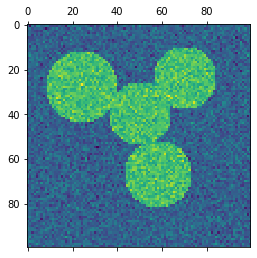

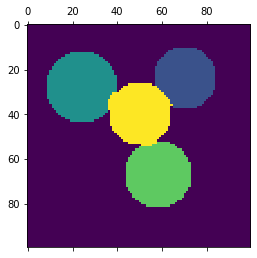

In [8]:
plt.matshow(img)
plt.matshow(labels_im)